# **LIBRERIAS**

In [584]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import os
# To plot pretty figures
%matplotlib inline
import matplotlib
from pylab import *

# **Obtencion de Datos**
Los datos utilizados para este proyecto fueron extraidos desde el github  "https://github.com/jmcastagnetto/covid-19-peru-data/blob/main/datos/covid-19-peru-data.csv" 

Esta base de datos está actualizada hasta el día 18 de octubre del 2020

In [585]:
#url = 'https://github.com/jmcastagnetto/covid-19-peru-data/blob/main/datos/covid-19-peru-data.csv'
covid_cases = pd.read_csv('covid-19-peru-data.csv', sep=',' ,header=0)
covid_cases.head()
covid_cases.tail()

,country,iso3c,region,date,confirmed,deaths,recovered,total_tests,negative_tests,pcr_test_positive,serological_test_positive,pcr_serological_test_positive
5580,Peru,PER,San Martín,2020-10-18,19855.0,720.0,NaN,80091.0,60236.0,2741.0,17114.0,NaN
5581,Peru,PER,Tacna,2020-10-18,12728.0,224.0,NaN,67933.0,55205.0,1604.0,11124.0,NaN
5582,Peru,PER,Tumbes,2020-10-18,7914.0,312.0,NaN,33561.0,25647.0,697.0,7217.0,NaN
5583,Peru,PER,Ucayali,2020-10-18,17203.0,335.0,NaN,55602.0,38399.0,1036.0,16167.0,NaN
5584,Peru,PER,NaN,2020-10-18,868675.0,33759.0,779779.0,4230353.0,3361678.0,196268.0,672407.0,NaN


# **Revisión de los datos**

In [586]:
covid_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5585 entries, 0 to 5584
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        5585 non-null   object 
 1   iso3c                          5585 non-null   object 
 2   region                         5359 non-null   object 
 3   date                           5585 non-null   object 
 4   confirmed                      5429 non-null   float64
 5   deaths                         4831 non-null   float64
 6   recovered                      244 non-null    float64
 7   total_tests                    4294 non-null   float64
 8   negative_tests                 4326 non-null   float64
 9   pcr_test_positive              4938 non-null   float64
 10  serological_test_positive      4874 non-null   float64
 11  pcr_serological_test_positive  24 non-null     float64
dtypes: float64(8), object(4)
memory usage: 523.7+ KB

In [587]:
covid_cases.describe()

,confirmed,deaths,recovered,total_tests,negative_tests,pcr_test_positive,serological_test_positive,pcr_serological_test_positive
count,5429.000000,4831.000000,244.000000,4.294000e+03,4.326000e+03,4938.000000,4874.000000,24.000000
mean,26957.135016,1219.199131,221519.381148,1.780356e+05,1.430985e+05,7145.795464,22224.867665,34.583333
std,95139.149892,4131.365404,244373.994631,5.319892e+05,4.256603e+05,25540.509572,73081.058572,72.926358
min,1.000000,1.000000,1.000000,3.250000e+03,-2.767580e+05,1.000000,1.000000,1.000000
25%,585.000000,27.000000,6779.250000,2.309825e+04,1.930125e+04,172.000000,918.250000,1.750000
50%,4711.000000,192.000000,133355.000000,4.506200e+04,3.655300e+04,879.000000,4931.000000,3.000000
75%,15066.000000,700.000000,374877.500000,8.429275e+04,6.669675e+04,2549.500000,13886.500000,6.250000
max,868675.000000,33759.000000,779779.000000,4.230353e+06,3.361678e+06,196268.000000,672407.000000,231.000000


In [588]:
covid_cases["region"].value_counts()

Cusco                 220
Ica                   220
Arequipa              220
Huánuco               220
La Libertad           218
Lambayeque            218
Ancash                218
Piura                 218
Callao                218
Loreto                216
Madre de Dios         215
Junín                 213
San Martín            210
Tumbes                209
Cajamarca             208
Pasco                 206
Tacna                 204
Ayacucho              204
Huancavelica          201
Apurimac              199
Moquegua              197
Puno                  195
Amazonas              194
Ucayali               192
Lima                  114
Lima Metropolitana    106
Lima Región           106
Name: region, dtype: int64

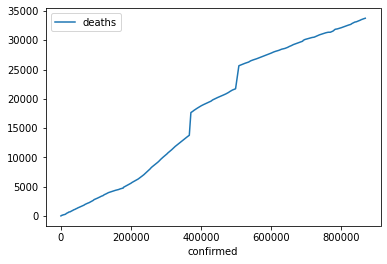

In [589]:
covid_cases[pd.isnull(covid_cases['region'])].plot(x='confirmed',y='deaths')

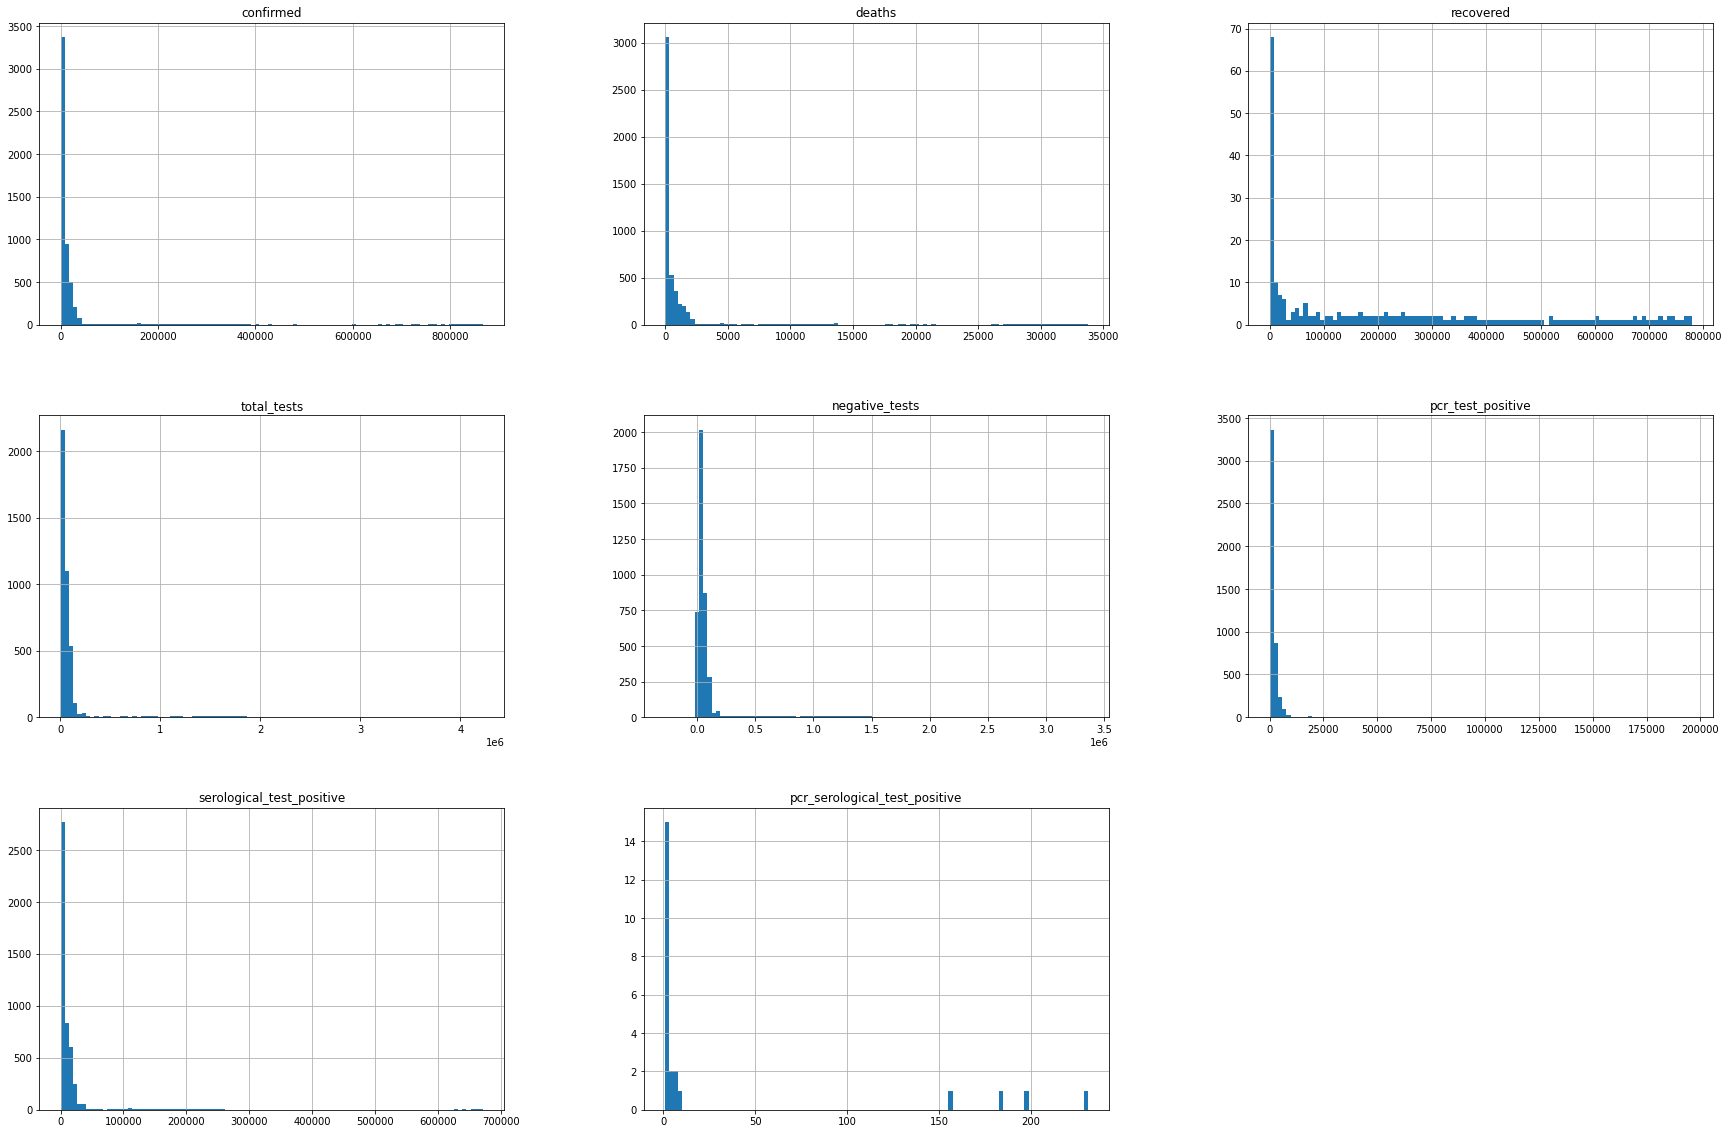

In [590]:
covid_cases.hist(bins=100, figsize=(30,20))
plt.show()

Las columnas necesarias para predecir lo pedido, son necesarias las columnas confirmed, deaths y date.
Además se puede visualizar cuantos afectados hay por región en el Perú.

Se separan los datos que se necesitan, se toma todas las regiones. Y se separa las columnas a usar como: date, confirmed y deaths.

EX

In [591]:
datos_peru = covid_cases.loc[pd.isnull(covid_cases['region'])]
datos_peru = datos_peru.drop(['country','iso3c','region','recovered','negative_tests','total_tests','negative_tests','pcr_test_positive','serological_test_positive', 'pcr_serological_test_positive'], axis=1)

#CREAR SUBCONJUNTOS, VI fecha
datos_deaths = datos_peru[['date','deaths','confirmed']]
datos_confirmed = datos_peru[['date','confirmed','deaths']]
datos_deaths = datos_deaths.drop(['confirmed'],axis=1)
datos_confirmed = datos_confirmed.drop(['deaths'],axis=1)

# **Convertir fecha a números**

Para el entrenamiento se toma los datos desde el inicio hasta el 31 de agosto. Para el testeo se toma los datos desde el 1 de septiembre hasta el final del csv.

In [592]:
datos_deaths['date'] = pd.to_datetime(datos_deaths['date']).dt.strftime("%Y%m%d").astype(int)
datos_confirmed['date'] = pd.to_datetime(datos_confirmed['date']).dt.strftime("%Y%m%d").astype(int)
new_date = list(range(1,len(datos_confirmed)+1))
datos_deaths_rw = datos_deaths.values
fecha_lim = np.where(datos_deaths_rw[:,0] == 20200901)

Generar un arreglo continuo de enteros new_date que representa los días transcurridos. Reeplaza a date

In [593]:
datos_deaths_rw = datos_deaths.values.astype(np.float32)
datos_deaths_rw[:,0] = new_date
datos_confirmed_rw = datos_confirmed.values.astype(np.float32)
datos_confirmed_rw[:,0] = new_date

In [594]:
print(new_date)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

# **Adaptación NAN y preparación de los datos**

In [595]:
#reemplazar nan
index = np.where(np.isnan(datos_deaths_rw))
datos_deaths_rw[index] = 0

In [596]:
def Normalizar_datos(arr):
  media = np.nanmean(arr,0)
  des_std = np.nanstd(arr,0)
  print(media,des_std)
  for i in range(0, arr.shape[0]):
    arr[i] = np.true_divide((arr[i] - media),des_std)
  return arr, media, des_std
  #retorna el arreglo normalizado, la media y la desviacion standar

Normalizar

In [597]:
datos_deaths_rw, _, _ = Normalizar_datos(datos_deaths_rw)
datos_confirmed_rw, _, _ = Normalizar_datos(datos_confirmed_rw)

[  113.5  13364.11] [   65.239944 12523.929   ]
[1.1350000e+02 3.3139622e+05] [6.5239944e+01 2.9172478e+05]


In [598]:
def Adaptar_conjuntos(train, test):
  test_y = test[:,-1:]
  test_x = test[:,0:-1]
  train_y = train[:,-1:]
  train_x = train[:,0:-1]

  train_x = np.insert(train_x, 0, 1, axis=1)
  test_x = np.insert(test_x, 0, 1, axis=1)
  return train_x, train_y, test_x, test_y

Separar los conjuntos de datos en train(x,y) y test(x,y).
Crear vectores de thetas.

In [599]:
#dividir segun fecha limite
train_set_deaths, test_set_deaths = np.split(datos_deaths_rw, fecha_lim[0])
train_set_confirmed, test_set_confirmed = np.split(datos_confirmed_rw,fecha_lim[0])

train_deaths_x, train_deaths_y, test_deaths_x, test_deaths_y = Adaptar_conjuntos(train_set_deaths, test_set_deaths)
theta_deaths = np.zeros(train_deaths_x.shape[1])[np.newaxis]

train_confirmed_x, train_confirmed_y, test_confirmed_x, test_confirmed_y = Adaptar_conjuntos(train_set_confirmed, test_set_confirmed)
theta_confirmed = np.zeros(train_confirmed_x.shape[1])[np.newaxis]

In [600]:
def Calcular_Costo(X, Y, Theta):
    m = len(X)
    costo = np.sum((X.dot(Theta.T) - Y)**2) / (2 * m)
    return costo 

In [601]:
def Gradiente_Descendiente(X, Y, Theta, iteraciones, tasa):
    costos = [0]*iteraciones
    m = len(X)
    for itr in range(iteraciones):
        h = X.dot(Theta.T)
        dif = h - Y
        derivada = (X.T).dot(dif) / m
        Theta = Theta - (tasa * derivada).T
        costos[itr] = Calcular_Costo(X, Y, Theta)
    return Theta, costos

Se aplica el algoritmo de gradiente descendiente para realizar regresion lineal. Luego se calcula los valores para el conjunto de testeo usando los nuevos thetas.

In [602]:
#def hypothesis(theta, X):
    #return theta*X

In [603]:
new_theta_deaths, costos_deaths = Gradiente_Descendiente(train_deaths_x,train_deaths_y,theta_deaths, 2500, 0.1)
new_theta_confirmed, costos_confirmed = Gradiente_Descendiente(train_confirmed_x,train_confirmed_y,theta_confirmed, 2500, 0.1)

In [604]:
deaths_prediccion_y = test_deaths_x.dot(new_theta_deaths.T)
confirmed_prediccion_y = test_confirmed_x.dot(new_theta_confirmed.T)

Text(0.5, 0, 'Dias')

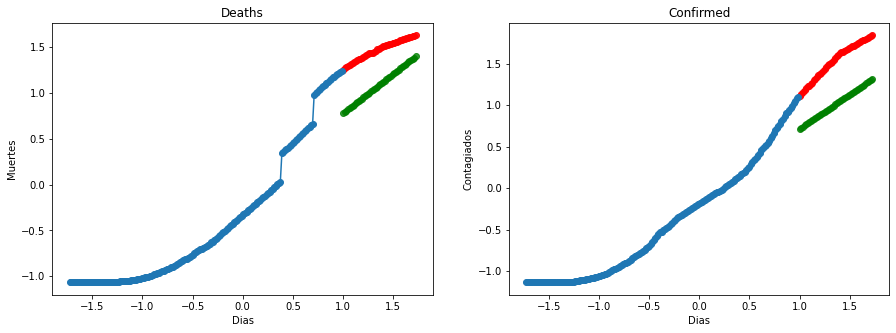

In [605]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].scatter(test_deaths_x[:,1], test_deaths_y, alpha=0.9, c="red")
ax[0].scatter(test_deaths_x[:,1], deaths_prediccion_y, alpha=0.8, c="green")
ax[0].plot(train_deaths_x[:,1], train_deaths_y, "-o")
ax[0].set_title("Deaths")
ax[0].set_ylabel('Muertes')
ax[0].set_xlabel('Dias')

ax[1].scatter(test_confirmed_x[:,1], test_confirmed_y, alpha=0.9, c="red")
ax[1].scatter(test_confirmed_x[:,1], confirmed_prediccion_y, alpha=0.8, c="green")
ax[1].plot(train_confirmed_x[:,1], train_confirmed_y, "-o")
ax[1].set_title("Confirmed")
ax[1].set_ylabel('Contagiados')
ax[1].set_xlabel('Dias')

De esto se concluye que el modelo tiene errores, el comportamiento de las variables es exponencial.
Se crea un subconjunto con datos date y confirmed como VI, y deaths como VD.

In [606]:
datos_confirmed_deaths = datos_peru[['date','confirmed','deaths']]

In [607]:
datos_confirmed_deaths['date'] = pd.to_datetime(datos_confirmed_deaths['date']).dt.strftime("%Y%m%d").astype(int)
datos_confirmed_deaths.head()
datos_confirmed_deaths.tail()

,date,confirmed,deaths
5476,20201014,856951.0,33512.0
5503,20201015,859740.0,33577.0
5530,20201016,862417.0,33648.0
5557,20201017,865549.0,33702.0
5584,20201018,868675.0,33759.0


In [608]:
datos_deaths_confirmed = datos_peru[['date','deaths', 'confirmed']]

In [609]:
datos_deaths_confirmed['date'] = pd.to_datetime(datos_deaths_confirmed['date']).dt.strftime("%Y%m%d").astype(int)
datos_deaths_confirmed.head()
datos_deaths_confirmed.tail()

,date,deaths,confirmed
5476,20201014,33512.0,856951.0
5503,20201015,33577.0,859740.0
5530,20201016,33648.0,862417.0
5557,20201017,33702.0,865549.0
5584,20201018,33759.0,868675.0


# **CASOS NUEVOS POR DÍA**

MUERTES

In [610]:
datos_confirmed_deaths_rw = datos_confirmed_deaths.values.astype(np.float32)
index = np.where(np.isnan(datos_confirmed_deaths_rw))
datos_confirmed_deaths_rw[index] = 0

O_datos_confirmed_deaths_rw = np.zeros(datos_confirmed_deaths_rw.shape)
crecimiento = np.zeros(len(datos_confirmed_deaths_rw) - 1)
O_datos_confirmed_deaths_rw[0] = datos_confirmed_deaths_rw[0]
O_datos_confirmed_deaths_rw[:,0] = new_date[:]

for i in range(1,len(datos_confirmed_deaths_rw)):
    O_datos_confirmed_deaths_rw[i,1] = datos_confirmed_deaths_rw[i,1] - datos_confirmed_deaths_rw[i-1,1]
    O_datos_confirmed_deaths_rw[i,2] = datos_confirmed_deaths_rw[i,2] - datos_confirmed_deaths_rw[i-1,2]
    crecimiento[i-1] = datos_confirmed_deaths_rw[i,1] / datos_confirmed_deaths_rw[i-1,1]

av_crecimiento = np.mean(crecimiento[-10:])
av_crecimiento

1.0035284161567688

Text(0.5, 0, 'Dias')

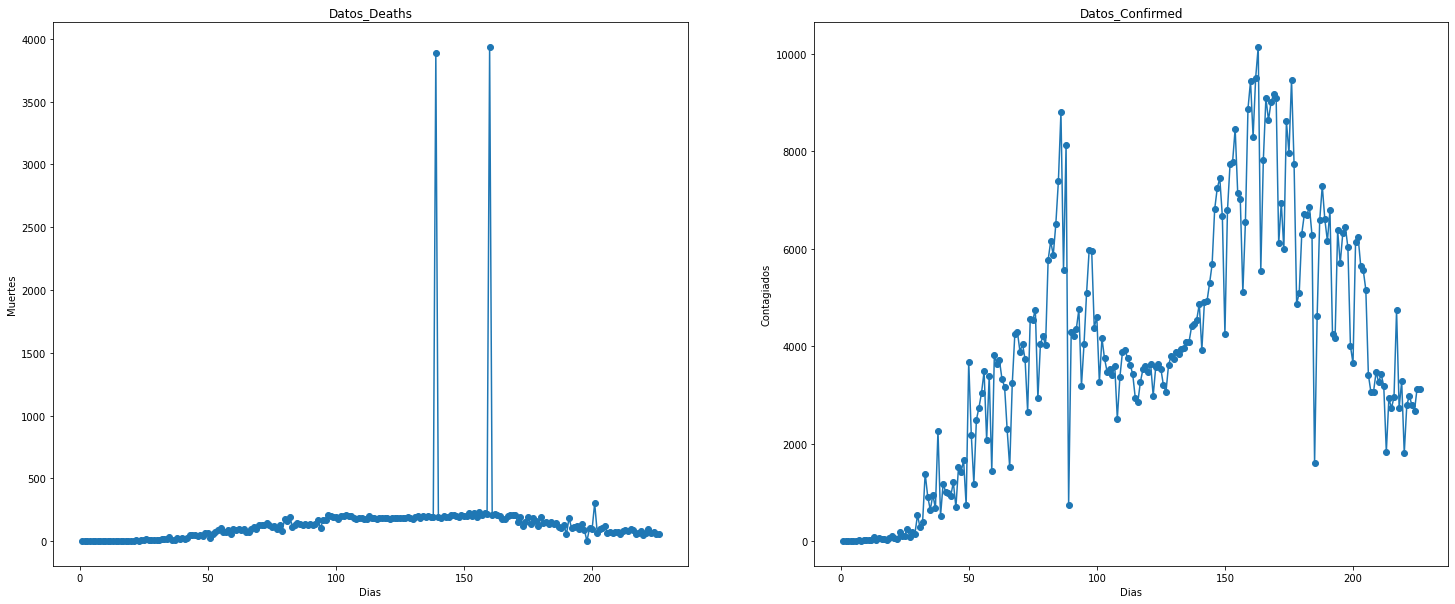

In [611]:
fig, ax = plt.subplots(1, 2, figsize=(25,10))

ax[0].plot(O_datos_confirmed_deaths_rw[:,0], O_datos_confirmed_deaths_rw[:,2], "-o")
ax[0].set_title("Datos_Deaths")
ax[0].set_ylabel('Muertes')
ax[0].set_xlabel('Dias')

ax[1].plot(O_datos_confirmed_deaths_rw[:,0], O_datos_confirmed_deaths_rw[:,1], "-o")
ax[1].set_title("Datos_Confirmed")
ax[1].set_ylabel('Contagiados')
ax[1].set_xlabel('Dias')

In [612]:
O_datos_confirmed_deaths_rw, _, _ = Normalizar_datos(O_datos_confirmed_deaths_rw)
train_set_DCD, test_set_DCD = np.split(O_datos_confirmed_deaths_rw, fecha_lim[0])

train_DCD_x, train_DCD_y, test_DCD_x, test_DCD_y = Adaptar_conjuntos(train_set_DCD, test_set_DCD)
theta_DCD = np.zeros(train_DCD_x.shape[1])[np.newaxis]

[ 113.5        3843.69469027  149.37610619] [  65.23994175 2516.20107313  362.67731721]


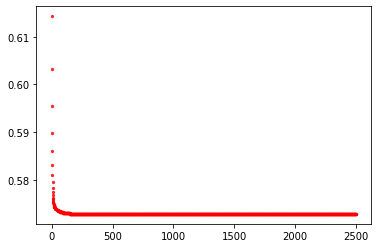

In [613]:
newtheta_DCD, costos_DCD = Gradiente_Descendiente(train_DCD_x, train_DCD_y, theta_DCD, 2500, 0.1)
plt.scatter(np.arange(2500), costos_DCD, alpha=0.8, c="red", s=5)

Text(0, 0.5, 'Muertes predicción')

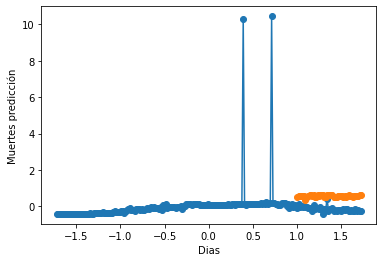

In [614]:
DCD_test_y = test_DCD_x.dot(newtheta_DCD.T)

plt.plot(O_datos_confirmed_deaths_rw[:,0], O_datos_confirmed_deaths_rw[:,-1],'-o')
plt.plot(test_DCD_x[:,1], DCD_test_y,'-o')
plt.xlabel('Dias')
plt.ylabel('Muertes predicción')

Se calcula las nuevas muertes por día y se evalua con las métricas mean squared error y root mean squared error.

In [615]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [616]:
print ('MSE', mean_squared_error(test_DCD_y, DCD_test_y))
print ('RMSE', sqrt(mean_squared_error(test_DCD_y, DCD_test_y)))

MSE 0.5165065937439484
RMSE 0.7186839317418668


# **TOTAL CASOS**

MUERTES

In [617]:
datos_confirmed_deaths_rw = datos_confirmed_deaths.values.astype(np.float32)
index = np.where(np.isnan(datos_confirmed_deaths_rw))
datos_confirmed_deaths_rw[index] = 0
datos_confirmed_deaths_rw[:,0] = new_date

#se usa despues
futuro = 11
cnt_real = len(datos_confirmed_deaths_rw)

In [618]:
DCD_rw, _, _ = Normalizar_datos(datos_confirmed_deaths_rw)

train_set_DCD, test_set_DCD = np.split(DCD_rw, fecha_lim[0])

train_DCD_x, train_DCD_y, test_DCD_x, test_DCD_y = Adaptar_conjuntos(train_set_DCD, test_set_DCD)
theta_DCD = np.zeros(train_DCD_x.shape[1])[np.newaxis]

[1.1350000e+02 3.3139622e+05 1.3364110e+04] [6.5239944e+01 2.9172478e+05 1.2523929e+04]


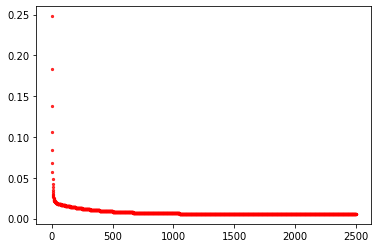

In [619]:
newtheta_DCD, costos_DCD = Gradiente_Descendiente(train_DCD_x, train_DCD_y, theta_DCD, 2500, 0.1)
plt.scatter(np.arange(2500), costos_DCD, alpha=0.8, c="red", s=5)

Text(0.5, 0, 'Dias')

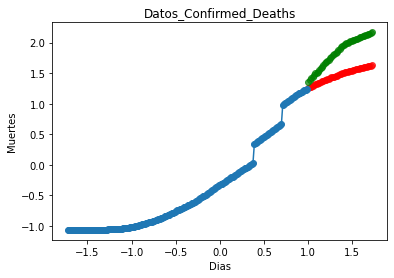

In [620]:
DCD_test_y = test_DCD_x.dot(newtheta_DCD.T)

plt.scatter(test_DCD_x[:,1], test_DCD_y, alpha=0.7, c="red")
plt.scatter(test_DCD_x[:,1], DCD_test_y, alpha=0.7, c="green")
plt.plot(train_DCD_x[:,1], train_DCD_y, "-o")
plt.title("Datos_Confirmed_Deaths")
plt.ylabel('Muertes')
plt.xlabel('Dias')

In [621]:
print ('MSE', mean_squared_error(test_DCD_y, DCD_test_y))
print ('RMSE', sqrt(mean_squared_error(test_DCD_y, DCD_test_y)))

MSE 0.16212080419393923
RMSE 0.4026422781998175


# **PREDICCIÓN**
Muertes

In [622]:
new_date = np.arange(cnt_real + futuro)
new_date += 1

DCD_PRED_rw = np.empty((cnt_real + futuro, datos_confirmed_deaths_rw.shape[1]))
DCD_PRED_rw[:,0] = new_date

In [623]:
datos_confirmed_deaths_rw = datos_confirmed_deaths.values.astype(np.float32)
index = np.where(np.isnan(datos_confirmed_deaths_rw))
datos_confirmed_deaths_rw[index] = 0

futuro_confirmed = np.empty((futuro,1))
futuro_deaths = np.empty((futuro, 1))
futuro_deaths[:] = np.nan

futuro_confirmed[0] = datos_confirmed_deaths_rw[-1,1] * av_crecimiento
for i in range(1,futuro):
  futuro_confirmed[i] = futuro_confirmed[i-1] * av_crecimiento

#union de datos reales con datos sinteticos
DCD_PRED_rw[:,0] = new_date
DCD_PRED_rw[:cnt_real,1] = datos_confirmed_deaths_rw[:,1]
DCD_PRED_rw[:cnt_real,2] = datos_confirmed_deaths_rw[:,2]
DCD_PRED_rw[cnt_real:,1] = futuro_confirmed.T
DCD_PRED_rw[cnt_real:,2] = futuro_deaths.T

Dividir en tres subconjutos: train, test y predicción

In [624]:
DCD_PRED_rw, media_DCD, des_std_DCD = Normalizar_datos(DCD_PRED_rw)
ptr = np.append (fecha_lim[0],[cnt_real])
train_set_PRED_DCD, test_set_PRED_DCD, PRED_set_DCD = np.split(DCD_PRED_rw,ptr)
print(train_set_PRED_DCD.shape, test_set_PRED_DCD.shape, PRED_set_DCD.shape)

train_DCD_PRED_x, train_DCD_PRED_y, test_DCD_PRED_x, test_DCD_PRED_y = Adaptar_conjuntos(train_set_PRED_DCD,test_set_PRED_DCD)

DCD_PRED_x = PRED_set_DCD[:,0:-1]
DCD_PRED_x = np.insert(DCD_PRED_x, 0, 1, axis=1)

[1.19000000e+02 3.57196875e+05 1.33641106e+04] [6.84153979e+01 3.07952133e+05 1.25239283e+04]
(178, 3) (48, 3) (11, 3)


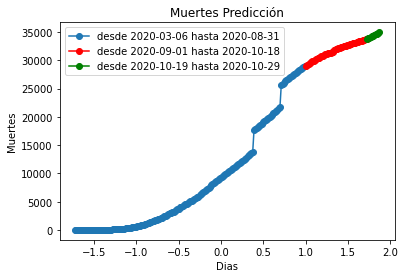

In [625]:
DCD_PRED_y = DCD_PRED_x.dot(newtheta_DCD.T)

dif_x = test_DCD_x[-1,1] - DCD_PRED_x[0,1]
dif_y = test_DCD_y[-1] - DCD_PRED_y[0]

DCD_PRED_x[:,1] += dif_x
DCD_PRED_y += dif_y

plt.plot(train_DCD_x[:,1], train_DCD_y*des_std_DCD[2]+media_DCD[2], "-o",label='desde 2020-03-06 hasta 2020-08-31')
plt.plot(test_DCD_x[:,1], test_DCD_y*des_std_DCD[2]+media_DCD[2],"-o",color="red",label='desde 2020-09-01 hasta 2020-10-18')
plt.plot(DCD_PRED_x[:,1], DCD_PRED_y*des_std_DCD[2]+media_DCD[2], "-o",color="green",label='desde 2020-10-19 hasta 2020-10-29')

plt.title("Muertes Predicción")
plt.ylabel('Muertes')
plt.xlabel('Dias')
plt.legend()

In [626]:
real_pred = np.rint(DCD_PRED_y*des_std_DCD[2]+media_DCD[2])
real_pred.T

array([[33759., 33878., 33998., 34119., 34240., 34362., 34485., 34608.,
        34732., 34857., 34982.]])

CASOS

# **Arequipa**
Seleccionar solo los datos de la región Arequipa

In [627]:
data_aqp = covid_cases.loc[covid_cases['region'] == 'Arequipa']
data_aqp = data_aqp.drop(['country','iso3c','region','recovered','negative_tests','total_tests','negative_tests','pcr_test_positive','serological_test_positive', 'pcr_serological_test_positive'], axis=1)
data_aqp.tail(20)

,date,confirmed,deaths
5048,2020-09-29,41748.0,1352.0
5075,2020-09-30,41882.0,1355.0
5102,2020-10-01,42006.0,1358.0
5129,2020-10-02,42109.0,1363.0
5156,2020-10-03,NaN,NaN
5183,2020-10-04,42314.0,1366.0
5210,2020-10-05,42372.0,1375.0
5237,2020-10-06,42439.0,1380.0
5264,2020-10-07,42536.0,1384.0
5291,2020-10-08,42647.0,1390.0


In [628]:
data_aqp['date'] = pd.to_datetime(data_aqp['date']).dt.strftime("%Y%m%d").astype(int)
aqp_rw = data_aqp.values
fecha_lim_aqp = np.where(aqp_rw[:,0]==20200901)

new_date_AQP = list(range(len(aqp_rw)))
aqp_rw[:,0] = new_date_AQP


#Se modifican los nan por el valor del dia anterior
aqp_rw[0,2] = 0
for i in range(1,len(aqp_rw)):
    if(np.isnan(aqp_rw[i,2])):
        aqp_rw[i,2] = aqp_rw[i-1,2]
aqp_rw[0,1] = 0
for i in range(1,len(aqp_rw)):
    if(np.isnan(aqp_rw[i,1])):
        aqp_rw[i,1] = aqp_rw[i-1,1]

index = np.where(np.isnan(aqp_rw))
aqp_rw[index] = 0

aqp_rw = aqp_rw.astype(np.float32)
#aqp_rw[-1,1] = aqp_rw[-2,1] + aqp_rw[-1,1]
#aqp_rw[-1,2] = aqp_rw[-2,2] + aqp_rw[-1,2]

Text(0, 0.5, 'Dias')

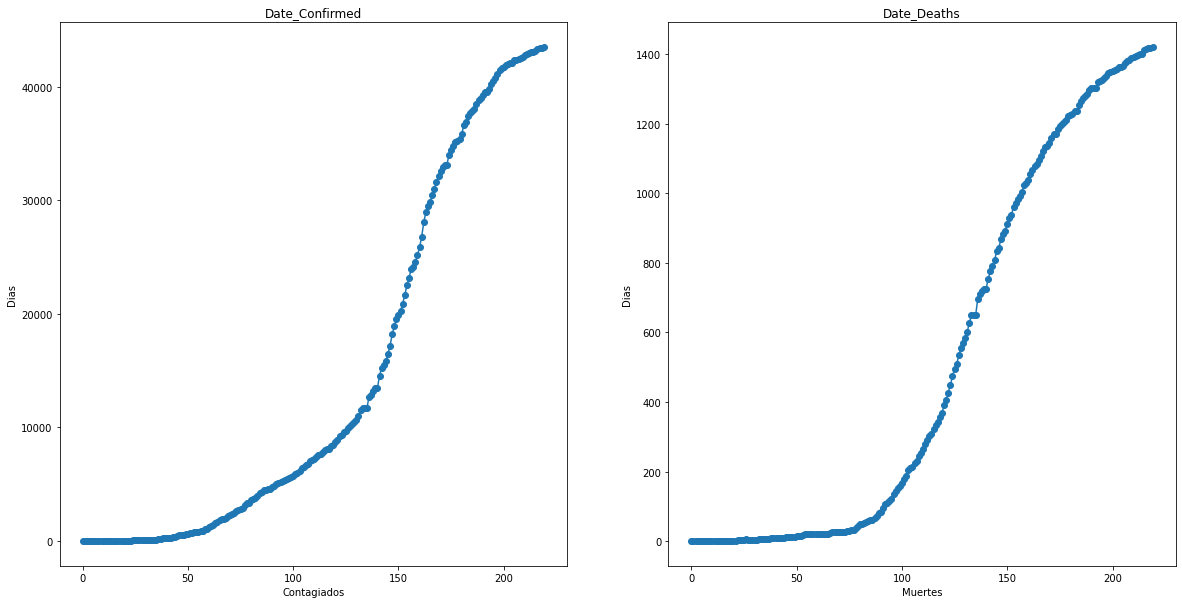

In [629]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

ax[0].plot(aqp_rw[:,0], aqp_rw[:,1], "-o")
ax[0].set_title("Date_Confirmed")
ax[0].set_xlabel('Contagiados')
ax[0].set_ylabel('Dias')

ax[1].plot(aqp_rw[:,0], aqp_rw[:,2], "-o")
ax[1].set_title("Date_Deaths")
ax[1].set_xlabel('Muertes')
ax[1].set_ylabel('Dias')

In [630]:
aqp_rw, media_aqp, std_aqp = Normalizar_datos(aqp_rw)
train_set_AQP, test_set_AQP = np.split(aqp_rw,fecha_lim_aqp[0])
print(train_set_AQP.shape, test_set_AQP.shape)
train_AQP_x, train_AQP_y, test_AQP_x, test_AQP_y = Adaptar_conjuntos(train_set_AQP, test_set_AQP)
Theta_AQP = np.zeros(train_AQP_x.shape[1])[np.newaxis]

[  109.5    14429.032    516.7682] [   63.507874 15574.838      538.41644 ]
(172, 3) (48, 3)


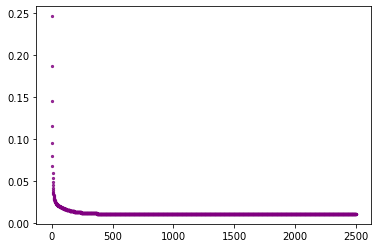

In [631]:
newTheta_AQP, costos_AQP = Gradiente_Descendiente(train_AQP_x, train_AQP_y, Theta_AQP, 2500, 0.1)
plt.scatter(np.arange(2500), costos_AQP, alpha=0.8, c="purple", s=5)

Text(0, 0.5, 'Nuevas Muertes')

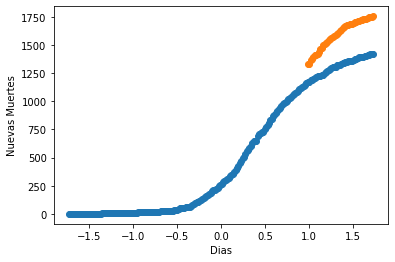

In [632]:
AQP_y_test = test_AQP_x.dot(newTheta_AQP.T)

plt.plot(aqp_rw[:,0], aqp_rw[:,-1]*std_aqp[2]+media_aqp[2],'-o')
plt.plot(test_AQP_x[:,1], AQP_y_test*std_aqp[2]+media_aqp[2],'-o')
plt.xlabel('Dias')
plt.ylabel('Nuevas Muertes')

In [633]:
print ('MSE', mean_squared_error(test_AQP_y, AQP_y_test))
print ('RMSE', sqrt(mean_squared_error(test_AQP_y, AQP_y_test)))

MSE 0.2846360407719242
RMSE 0.5335129246531186


In [634]:
aqp_rw = data_aqp.values.astype(np.float32)
futuro_AQP = 11
cnt_real_AQP = len(aqp_rw)

new_date_AQP = np.arange(cnt_real_AQP + futuro_AQP)
new_date_AQP+=1

aqp_rw_Pred = np.empty((cnt_real_AQP + futuro_AQP, aqp_rw.shape[1]))
aqp_rw_Pred[:,0] = new_date_AQP
aqp_rw = aqp_rw.astype(np.float32)
#aqp_rw[-1,1] = aqp_rw[-2,1] + aqp_rw[-1,1]
#aqp_rw[-1,2] = aqp_rw[-2,2] + aqp_rw[-1,2]

In [635]:
crecimiento_AQP = np.empty(len(aqp_rw)-1)
#crecimiento_AQP = np.zeros(aqp_rw.shape)
for i in range(1,len(aqp_rw)):
    crecimiento_AQP[i-1] = aqp_rw[i,1] / aqp_rw[i-1,1]
av_crecimiento_AQP = np.mean(crecimiento_AQP[-10:])
av_crecimiento_AQP

1.001982617378235

In [636]:
aqp_rw[0,2] = 0
for i in range(1,len(aqp_rw)):
    if(np.isnan(aqp_rw[i,2])):
        aqp_rw[i,2] = aqp_rw[i-1,2]

AQP_future_confirmed = np.empty((futuro_AQP,1))
AQP_future_deaths = np.empty((futuro_AQP,1))
AQP_future_deaths[:] = np.nan

AQP_future_confirmed[0] = aqp_rw[-1,1] * av_crecimiento_AQP
for i in range(1, futuro_AQP):
    AQP_future_confirmed[i] = AQP_future_confirmed[i-1] * av_crecimiento_AQP

print (aqp_rw_Pred.shape)

aqp_rw_Pred[:,0] = new_date_AQP
aqp_rw_Pred[:cnt_real_AQP,1] = aqp_rw[:,1]
aqp_rw_Pred[:cnt_real_AQP,2] = aqp_rw[:,2]
aqp_rw_Pred[cnt_real_AQP:,1] = AQP_future_confirmed.T
aqp_rw_Pred[cnt_real_AQP:,2] = AQP_future_deaths.T

(231, 3)


In [637]:
aqp_rw_Pred, mean_AQP, std_AQP = Normalizar_datos(aqp_rw_Pred)
ptr = np.append (fecha_lim_aqp[0],[cnt_real_AQP])
train_set_AQP_P, test_set_AQP_P, pred_set_AQP = np.split(aqp_rw_Pred, ptr)
print(train_set_AQP_P.shape, test_set_AQP_P.shape, pred_set_AQP.shape)

train_AQP_x, train_AQP_y, test_AQP_x, test_AQP_y = Adaptar_conjuntos(train_set_AQP_P, test_set_AQP_P)
# Theta_DCD = np.zeros(train_DCD_x.shape[1])[np.newaxis]

pred_AQP_x = pred_set_AQP[:,0:-1]
pred_AQP_x = np.insert(pred_AQP_x, 0, 1, axis=1)

[  116.         15586.35502364   516.76818182] [   66.68333125 16456.70310466   538.41641192]
(172, 3) (48, 3) (11, 3)


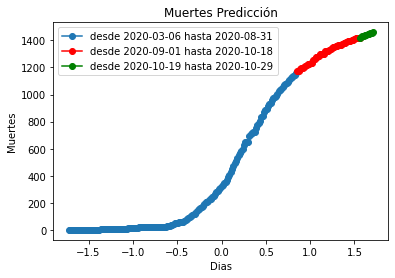

In [638]:
AQP_y_pred = pred_AQP_x.dot(newTheta_AQP.T)

dif_x = test_AQP_x[-1,1] - pred_AQP_x[0,1]
dif_y = test_AQP_y[-1] - AQP_y_pred[0]

pred_AQP_x[:,1] += dif_x
AQP_y_pred += dif_y

plt.plot(train_AQP_x[:,1], train_AQP_y*std_aqp[2]+mean_AQP[2], "-o",label='desde 2020-03-06 hasta 2020-08-31')
plt.plot(test_AQP_x[:,1], test_AQP_y*std_aqp[2]+mean_AQP[2],"-o",color="red",label='desde 2020-09-01 hasta 2020-10-18')
plt.plot(pred_AQP_x[:,1], AQP_y_pred*std_aqp[2]+mean_AQP[2], "-o",color="green",label='desde 2020-10-19 hasta 2020-10-29')

plt.title("Muertes Predicción")
plt.ylabel('Muertes')
plt.xlabel('Dias')
plt.legend()

In [639]:
real_pred_AQP = np.rint(AQP_y_pred*std_AQP[2]+mean_AQP[2])
real_pred_AQP.T

array([[1421., 1425., 1429., 1433., 1436., 1440., 1444., 1448., 1452.,
        1456., 1460.]])